<a href="https://colab.research.google.com/github/Junjaee/Study/blob/main/Python_Data_Analytics_Library/04_%EB%B6%84%EC%84%9D%EC%98%88%EC%A0%9C1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import matplotlib as mpl
import matplotlib.font_manager as fm
fm.FontProperties(fname = "맑은 고딕")
mpl.rcParams["axes.unicode_minus"] = False # 음수표시

import seaborn as sns

plt.style.use("fivethirtyeight")

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# 한글 깨짐 방지를 위한 나눔 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

# 설치후 런타임 다시시작

In [2]:
# 폰트 적용
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

### 서울시 공공 자전거 대여 분석

#### 1) 데이터 준비

In [3]:
##### 데이터 불러오기 및 확인
from google.colab import files
myfile = files.upload()

Saving SeoulBikeData.csv to SeoulBikeData.csv


In [25]:
import io

bike = pd.read_csv(io.BytesIO(myfile['SeoulBikeData.csv']), encoding = 'CP949')

bike.head(50)

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.00,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.00,0.0,0.0,Winter,No Holiday,Yes
5,01/12/2017,100,5,-6.4,37,1.5,2000,-18.7,0.00,0.0,0.0,Winter,No Holiday,Yes
6,01/12/2017,181,6,-6.6,35,1.3,2000,-19.5,0.00,0.0,0.0,Winter,No Holiday,Yes
7,01/12/2017,460,7,-7.4,38,0.9,2000,-19.3,0.00,0.0,0.0,Winter,No Holiday,Yes
8,01/12/2017,930,8,-7.6,37,1.1,2000,-19.8,0.01,0.0,0.0,Winter,No Holiday,Yes
9,01/12/2017,490,9,-6.5,27,0.5,1928,-22.4,0.23,0.0,0.0,Winter,No Holiday,Yes


In [5]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      8760 non-null   object 
 1   Rented Bike Count         8760 non-null   int64  
 2   Hour                      8760 non-null   int64  
 3   Temperature(C)            8760 non-null   float64
 4   Humidity(%)               8760 non-null   int64  
 5   Wind speed (m/s)          8760 non-null   float64
 6   Visibility (10m)          8760 non-null   int64  
 7   Dew point temperature(C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)   8760 non-null   float64
 9   Rainfall(mm)              8760 non-null   float64
 10  Snowfall (cm)             8760 non-null   float64
 11  Seasons                   8760 non-null   object 
 12  Holiday                   8760 non-null   object 
 13  Functioning Day           8760 non-null   object 
dtypes: float

#### 2) 시간대별로 평균 몇 대가 대여 되었을까?



In [6]:
bike.groupby("Hour")["Rented Bike Count"].mean()

Hour
0      541.460274
1      426.183562
2      301.630137
3      203.331507
4      132.591781
5      139.082192
6      287.564384
7      606.005479
8     1015.701370
9      645.983562
10     527.821918
11     600.852055
12     699.441096
13     733.246575
14     758.824658
15     829.186301
16     930.621918
17    1138.509589
18    1502.926027
19    1195.147945
20    1068.964384
21    1031.449315
22     922.797260
23     671.126027
Name: Rented Bike Count, dtype: float64

#### 3) 위의 결과를 시각화


Text(16, 150, '퇴근')

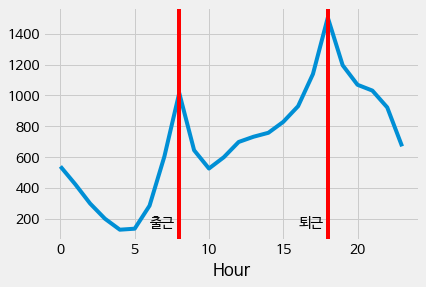

In [40]:
bike.groupby("Hour")["Rented Bike Count"].mean().plot()

plt.axvline(x = 8, color = 'r')
plt.axvline(x = 18, color = 'r')
plt.text(6, 150, "출근")
plt.text(16, 150, "퇴근")

#### 3) 2016년 1월 1일은 금요일이었다. Date변수에서 요일을 뽑아서 파생변수 만들기

In [34]:
bike['weekdays'] = ((pd.to_datetime(bike['Date']) - pd.to_datetime('2016-01-01')).dt.days)%7

bike['weekdays'] = bike['weekdays'].map({0 : 'FRI',
                                         1 : 'SAT',
                                         2 : 'SUN',
                                         3 : 'MON',
                                         4 : 'TUE',
                                         5 : 'WED',
                                         6 : 'THU'})

In [35]:
bike['weekdays']

0       THU
1       THU
2       THU
3       THU
4       THU
       ... 
8755    FRI
8756    FRI
8757    FRI
8758    FRI
8759    FRI
Name: weekdays, Length: 8760, dtype: object

#### 5) 요일별로 평균 몇대가 대여되었을까?

In [36]:
bike.groupby("weekdays")["Rented Bike Count"].mean()

weekdays
FRI    734.449346
MON    719.635833
SAT    730.348558
SUN    615.968364
THU    743.803686
TUE    678.362421
WED    714.521226
Name: Rented Bike Count, dtype: float64

#### 6) 위의 결과를 막대 그래프로 시각화

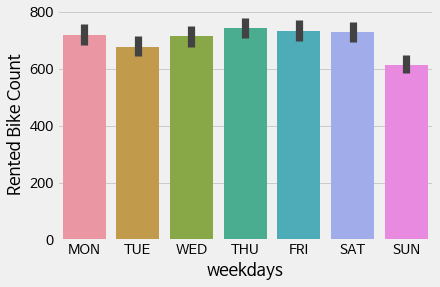

In [39]:
sns.barplot(x = "weekdays", y = "Rented Bike Count", data = bike,
            order = ["MON", "TUE", "WED", "THU", "FRI", "SAT", "SUN"])

#### 7) 요일 별 시간대별로 시각화

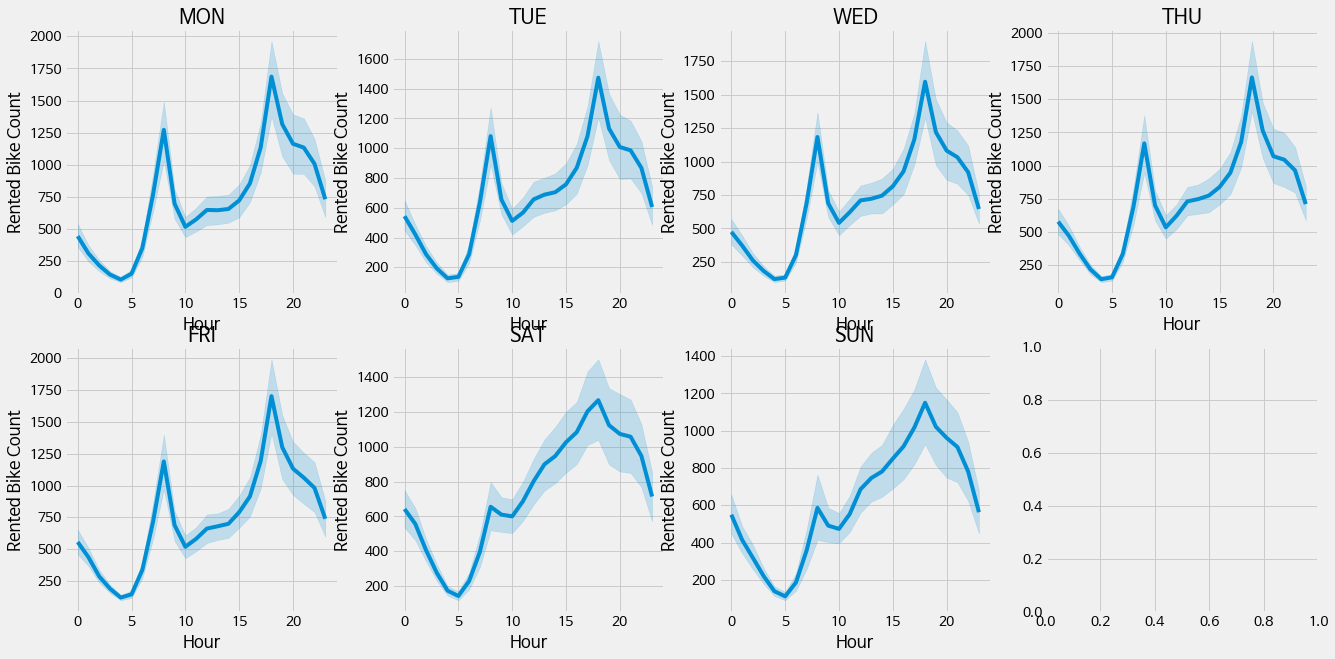

In [54]:
f, ax = plt.subplots(2, 4, figsize = (20, 10))

weekdays_list = ["MON", "TUE", "WED", "THU", "FRI", "SAT", "SUN"]

for i in range(7):
  sns.lineplot("Hour", "Rented Bike Count", data = bike.loc[bike["weekdays"] == weekdays_list[i]],
               ax = ax[i//4, i%4])
  
  ax[i//4, i%4].set_title(weekdays_list[i])